In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import sys
sys.path.append("..")
import statistics
from pyfolio import timeseries
from copy import deepcopy
import matplotlib.pyplot as plt
from config import (
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    VALID_1_START_DATE,
    VALID_1_END_DATE,
    VALID_2_START_DATE,
    VALID_2_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE
    
)
import warnings
warnings.filterwarnings('ignore')

/home/david/anaconda3/envs/torch_RL/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# tech_new_d = pd.read_csv("training/TI_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# tech_pnl_d = pd.read_csv("training/TI_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# tech_new_h = pd.read_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# tech_pnl_h = pd.read_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# tech_new_d.to_csv("training/TI_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# tech_pnl_d.to_csv("training/TI_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)
# tech_new_h.to_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# tech_pnl_h.to_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)

In [3]:
# stack_1_new_d = pd.read_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# stack_1_pnl_d = pd.read_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# stack_1_new_h = pd.read_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# stack_1_pnl_h = pd.read_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# stack_1_new_d.to_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# stack_1_pnl_d.to_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)
# stack_1_new_h.to_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# stack_1_pnl_h.to_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)

In [4]:
# stack_5_new_d = pd.read_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# stack_5_pnl_d = pd.read_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# stack_5_new_h = pd.read_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index_col=0)
# stack_5_pnl_h = pd.read_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index_col=0)
# stack_5_new_d.to_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# stack_5_pnl_d.to_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)
# stack_5_new_h.to_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv", index=False)
# stack_5_pnl_h.to_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv", index=False)

In [5]:
tech_new_d = pd.read_csv("training/TI_test_default_ppo_act_0.1_seed_42_new_reward.csv")
tech_pnl_d = pd.read_csv("training/TI_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")
tech_new_h = pd.read_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv")
tech_pnl_h = pd.read_csv("training/TI_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")

In [6]:
stack_1_new_d = pd.read_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_new_reward.csv")
stack_1_pnl_d = pd.read_csv("training/stack_1_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")
stack_1_new_h = pd.read_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv")
stack_1_pnl_h = pd.read_csv("training/stack_1_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")

In [7]:
stack_5_new_d = pd.read_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_new_reward.csv")
stack_5_pnl_d = pd.read_csv("training/stack_5_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")
stack_5_new_h = pd.read_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_new_reward.csv")
stack_5_pnl_h = pd.read_csv("training/stack_5_hourly_test_default_ppo_act_0.1_seed_42_pnl_reward.csv")

In [8]:
baseline = pd.read_csv("EDA/baseline3.csv")

In [9]:
baseline

,timestamp,portfolio_value
0,2023-01-01,100000.000000
1,2023-01-02,100412.933818
2,2023-01-03,103313.962420
3,2023-01-04,105060.260162
4,2023-01-05,109268.383736
...,...,...
85,2023-03-27,142381.221184
86,2023-03-28,138799.453619
87,2023-03-29,142523.375185
88,2023-03-30,146292.875867


In [10]:
tech_new_h = tech_new_h[::24]
tech_pnl_h = tech_pnl_h[::24]
stack_1_new_h = stack_1_new_h[::24]
stack_1_pnl_h = stack_1_pnl_h[::24]
stack_5_new_h = stack_5_new_h[::24]
stack_5_pnl_h = stack_5_pnl_h[::24]

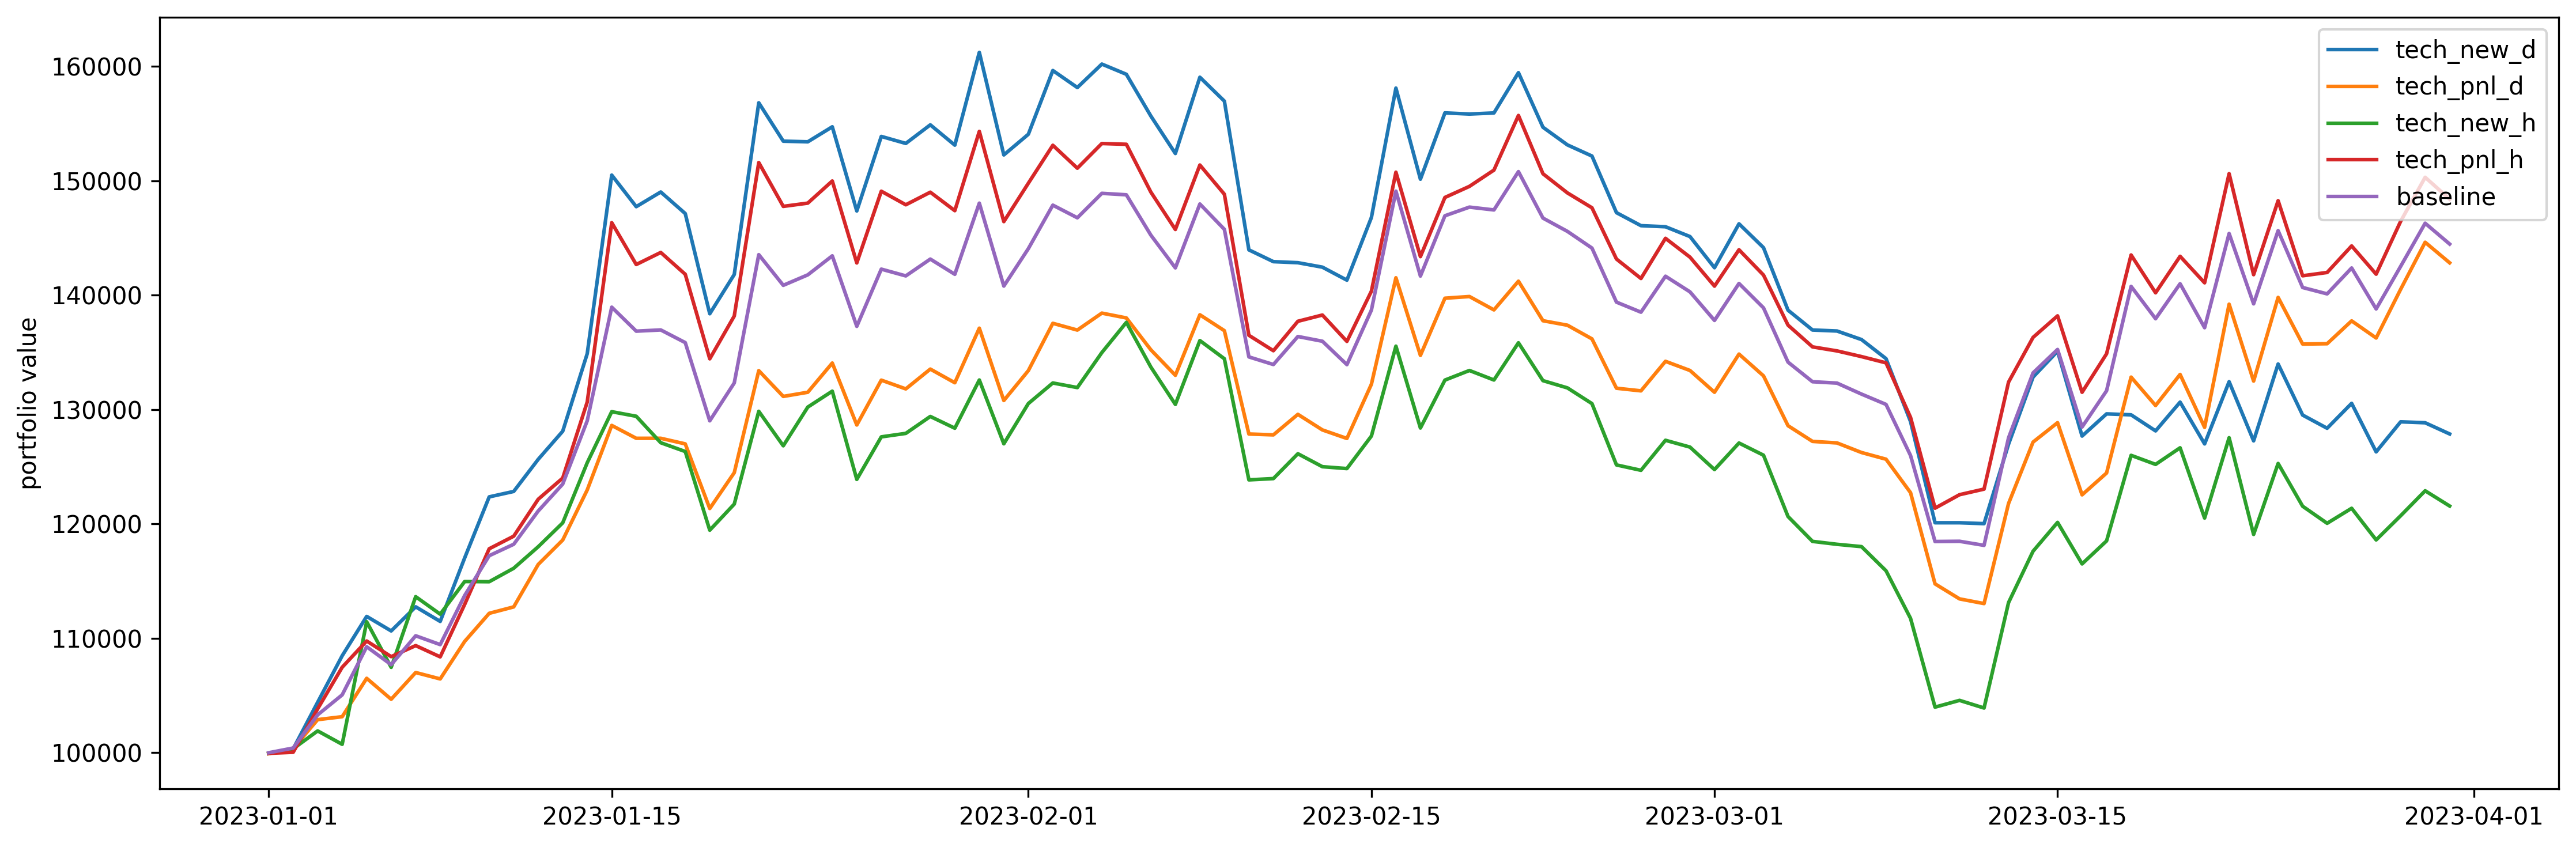

In [11]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

x = tech_new_d["timestamp"]
x = pd.to_datetime(x)
y = tech_new_d["round_30"]
plt.plot(x,y,label = "tech_new_d")
y = tech_pnl_d["round_30"]
plt.plot(x,y,label = "tech_pnl_d")
y = tech_new_h["round_30"]
plt.plot(x,y,label = "tech_new_h")
y = tech_pnl_h["round_30"]
plt.plot(x,y,label = "tech_pnl_h")
y = baseline["portfolio_value"]
plt.plot(x,y,label = "baseline")
plt.ylabel("portfolio value")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("../plot/fig_save/tech_valid_3.png")
plt.show()


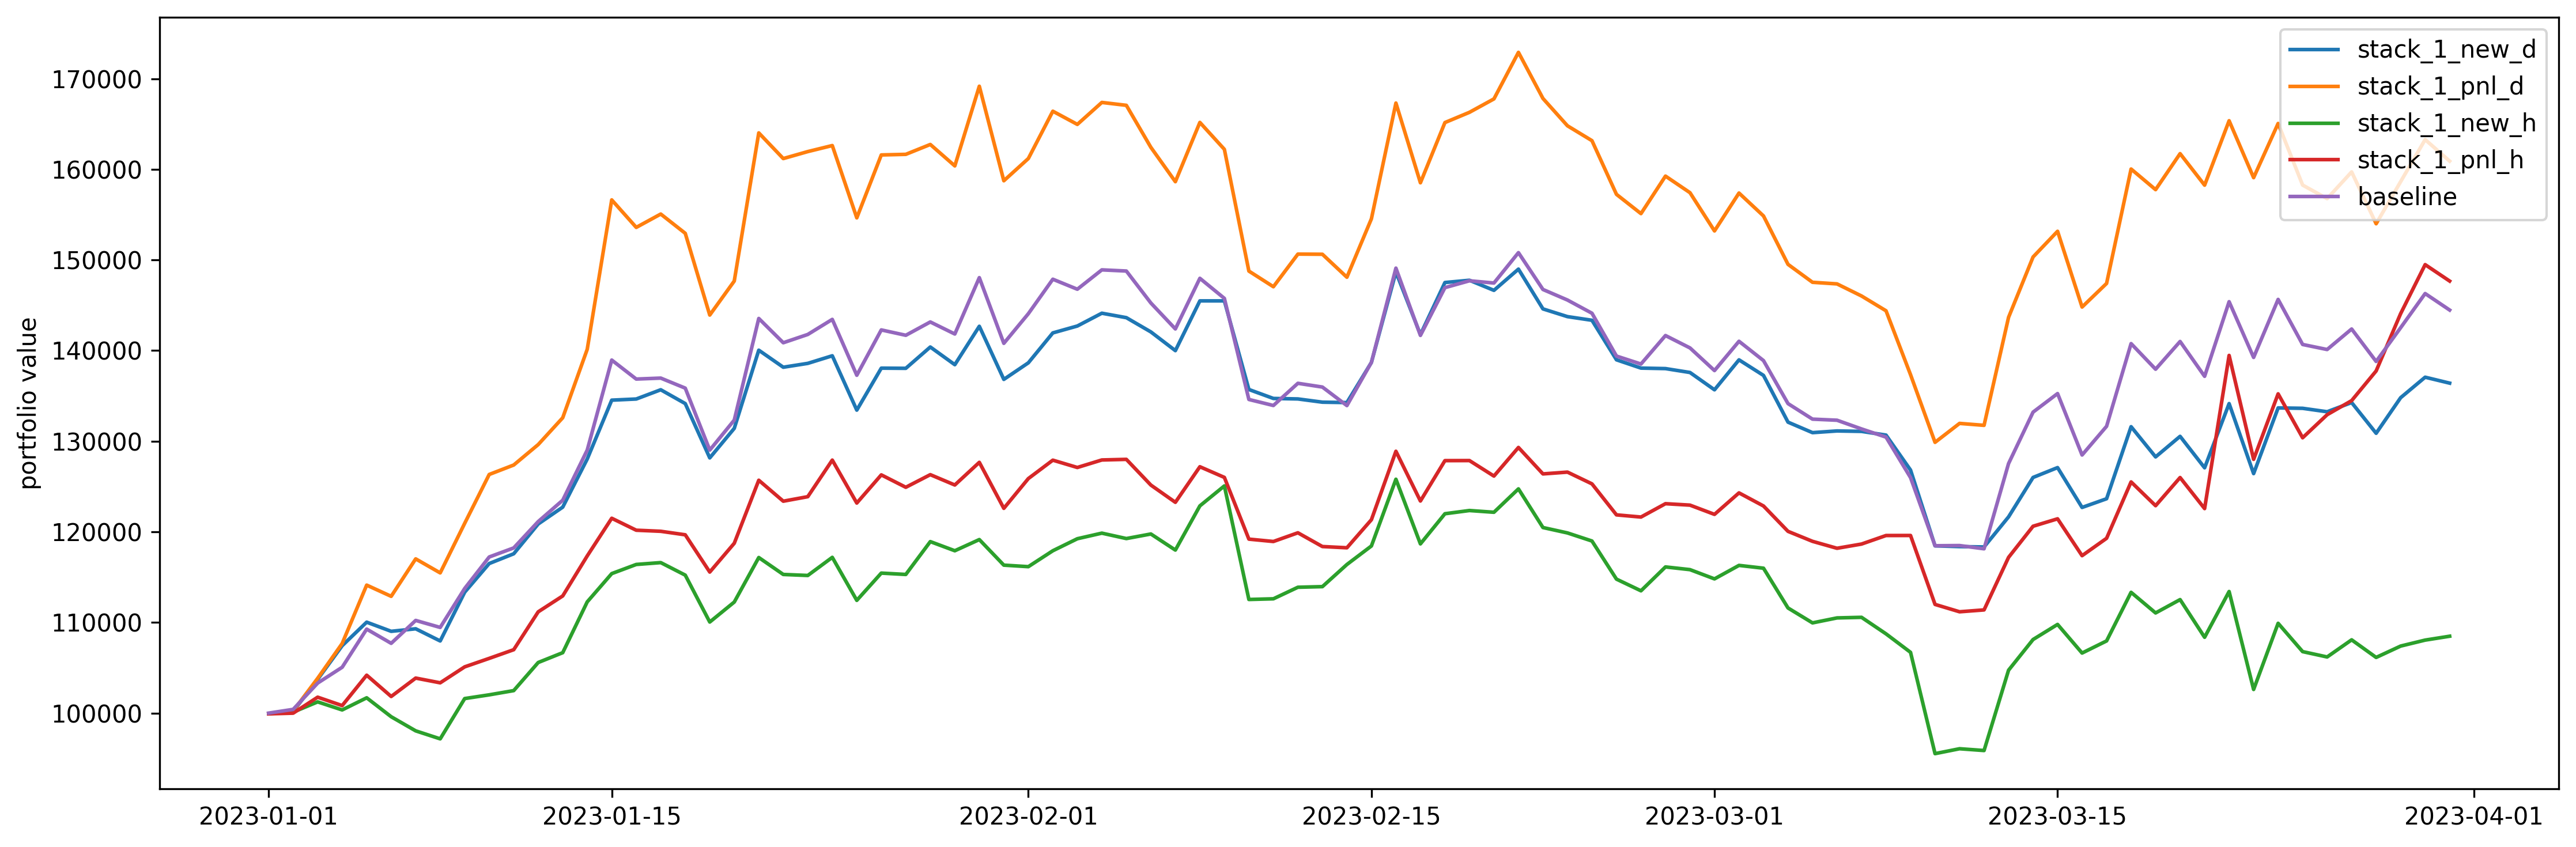

In [12]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

x = stack_1_new_d["timestamp"]
x = pd.to_datetime(x)
y = stack_1_new_d["round_30"]
plt.plot(x,y,label = "stack_1_new_d")
y = stack_1_pnl_d["round_30"]
plt.plot(x,y,label = "stack_1_pnl_d")
y = stack_1_new_h["round_30"]
plt.plot(x,y,label = "stack_1_new_h")
y = stack_1_pnl_h["round_30"]
plt.plot(x,y,label = "stack_1_pnl_h")
y = baseline["portfolio_value"]
plt.plot(x,y,label = "baseline")
plt.ylabel("portfolio value")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("../plot/fig_save/stack_1_valid_3.png")
plt.show()


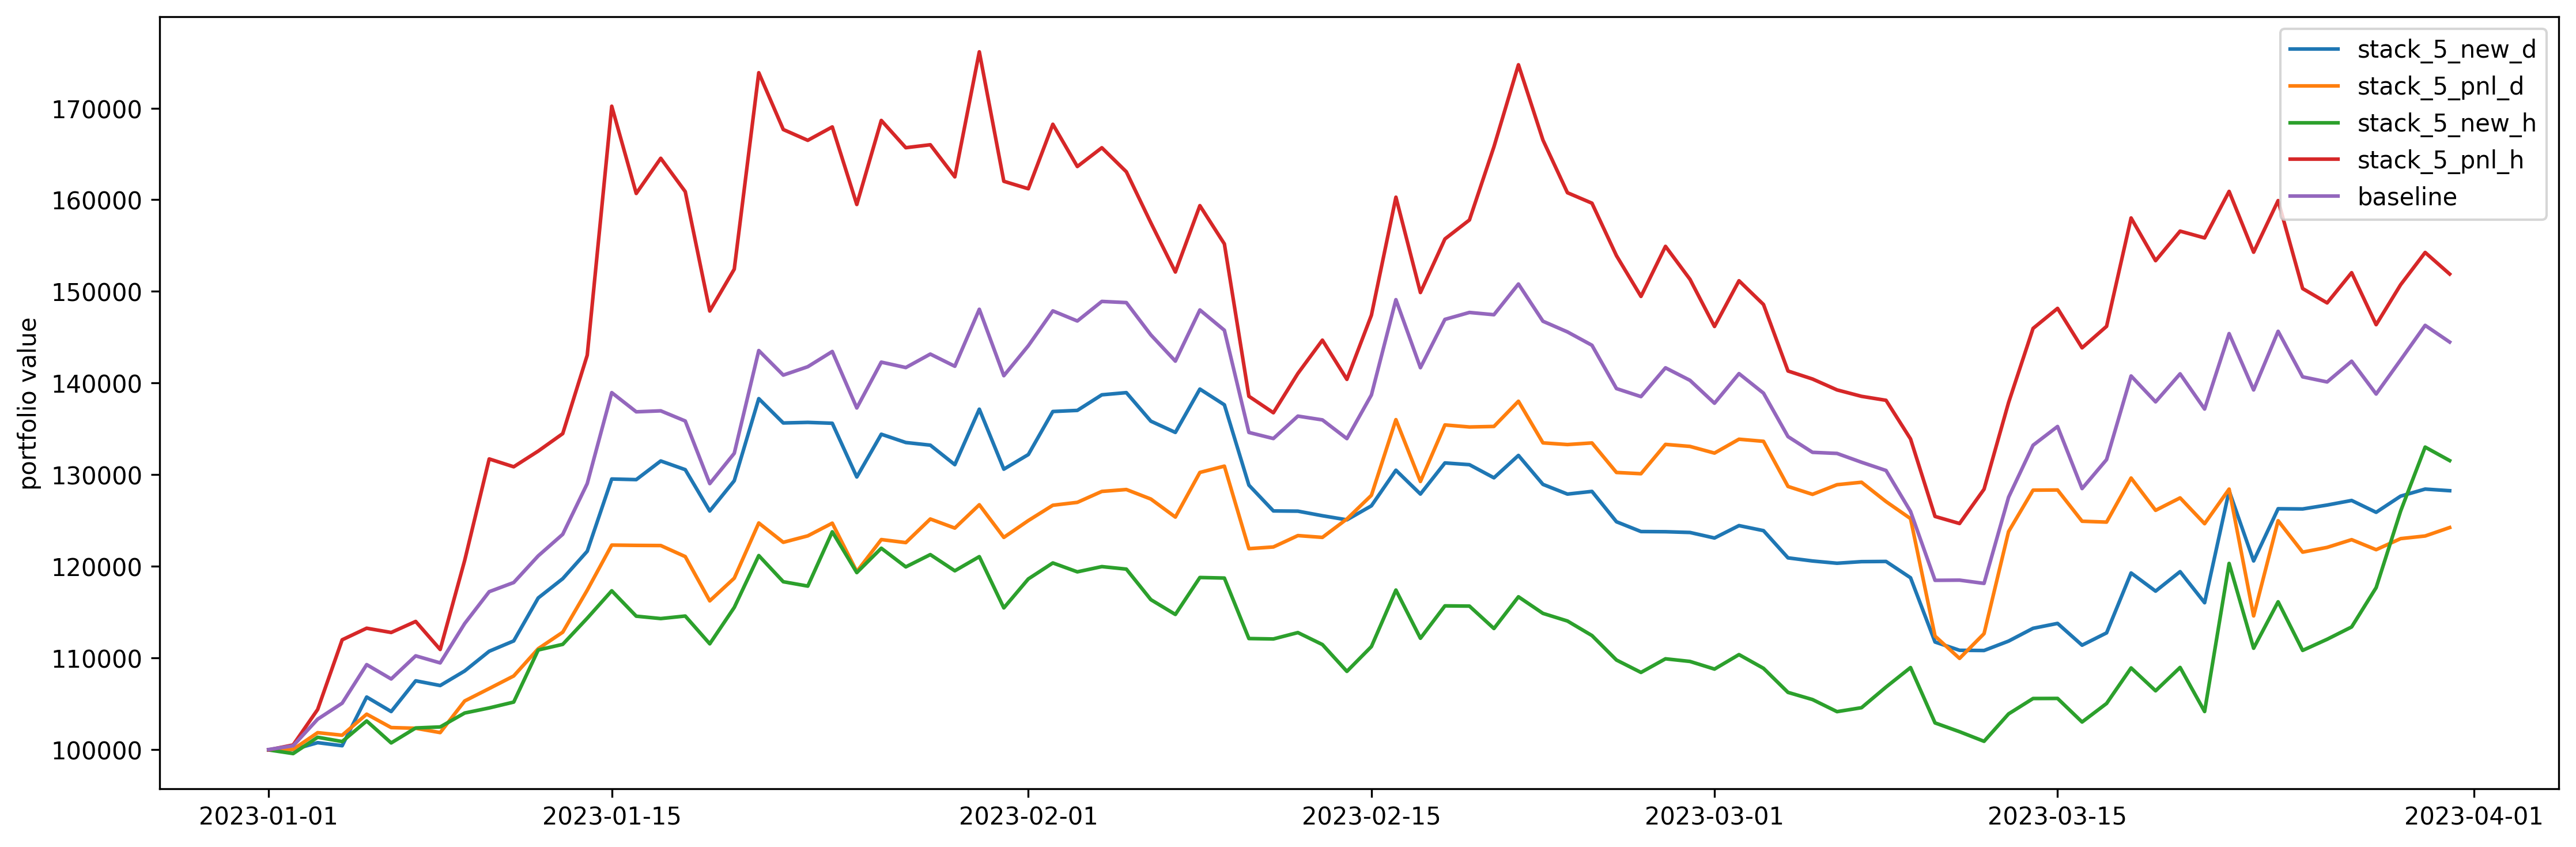

In [13]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

x = stack_1_new_d["timestamp"]
x = pd.to_datetime(x)
y = stack_5_new_d["round_30"]
plt.plot(x,y,label = "stack_5_new_d")
y = stack_5_pnl_d["round_30"]
plt.plot(x,y,label = "stack_5_pnl_d")
y = stack_5_new_h["round_30"][:len(y)]
plt.plot(x,y,label = "stack_5_new_h")
y = stack_5_pnl_h["round_30"][:len(y)]
plt.plot(x,y,label = "stack_5_pnl_h")
y = baseline["portfolio_value"]
plt.plot(x,y,label = "baseline")
plt.ylabel("portfolio value")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("../plot/fig_save/stack_5_valid_3.png")
plt.show()


In [14]:
def get_daily_return(df, value_col_name="portfolio_value"):
    df = deepcopy(df)
    df["daily_return"] = df[value_col_name].pct_change(1)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.set_index("timestamp", inplace=True, drop=True)
    df.index = df.index.tz_localize("UTC")
    return pd.Series(df["daily_return"], index=df.index)

In [15]:
def backtest_stats(account_value, value_col_name="portfolio_value"):
    dr_test = get_daily_return(account_value, value_col_name=value_col_name)
    perf_stats_all = timeseries.perf_stats(
        returns=dr_test,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    return perf_stats_all

In [16]:
backtest_stats(tech_new_d, "round_1")

Annual return          1.294762
Cumulative returns     0.345349
Annual volatility      0.417844
Sharpe ratio           2.217769
Calmar ratio           7.742478
Stability              0.251247
Max drawdown          -0.167228
Omega ratio            1.459593
Sortino ratio          3.800547
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.252328
Daily value at risk   -0.048966
dtype: float64

## tech_added_score

In [17]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in tech_new_d.columns[21:]:
    res = backtest_stats(tech_new_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 1.17
Standard deviation of annualized return: 0.32
Mean Sharpe ratio: 1.84
Standard deviation of Sharpe ratio: 0.23
Mean Sortino ratio: 2.99
Standard deviation of Sortino ratio: 0.45
Mean max drawdown: -0.23
Standard deviation of max drawdown: 0.01


In [18]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 1.96
Corresponding Sharpe ratio: 2.25
Corresponding Sortino ratio: 3.88
Corresponding max drawdown: -0.24


In [19]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []

for i in tech_new_h.columns[21:]:
    res = backtest_stats(tech_new_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 0.37
Standard deviation of annualized return: 0.27
Mean Sharpe ratio: 0.81
Standard deviation of Sharpe ratio: 0.40
Mean Sortino ratio: 1.26
Standard deviation of Sortino ratio: 0.63
Mean max drawdown: -0.32
Standard deviation of max drawdown: 0.04


In [20]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 0.73
Corresponding Sharpe ratio: 1.30
Corresponding Sortino ratio: 2.02
Corresponding max drawdown: -0.24


In [21]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []

for i in tech_pnl_d.columns[21:]:
    res = backtest_stats(tech_pnl_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 1.89
Standard deviation of annualized return: 0.25
Mean Sharpe ratio: 2.46
Standard deviation of Sharpe ratio: 0.16
Mean Sortino ratio: 4.20
Standard deviation of Sortino ratio: 0.36
Mean max drawdown: -0.19
Standard deviation of max drawdown: 0.02


In [22]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 2.32
Corresponding Sharpe ratio: 2.74
Corresponding Sortino ratio: 4.82
Corresponding max drawdown: -0.16


In [23]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []

for i in tech_pnl_h.columns[21:]:
    res = backtest_stats(tech_pnl_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 2.18
Standard deviation of annualized return: 0.92
Mean Sharpe ratio: 2.32
Standard deviation of Sharpe ratio: 0.16
Mean Sortino ratio: 3.98
Standard deviation of Sortino ratio: 0.40
Mean max drawdown: -0.22
Standard deviation of max drawdown: 0.04


In [24]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 4.73
Corresponding Sharpe ratio: 2.42
Corresponding Sortino ratio: 4.76
Corresponding max drawdown: -0.31


## stack_1_added_score

In [25]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []

for i in stack_1_new_d.columns[21:]:
    res = backtest_stats(stack_1_new_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 2.06
Standard deviation of annualized return: 0.90
Mean Sharpe ratio: 2.31
Standard deviation of Sharpe ratio: 0.37
Mean Sortino ratio: 4.14
Standard deviation of Sortino ratio: 0.95
Mean max drawdown: -0.22
Standard deviation of max drawdown: 0.01


In [26]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 3.93
Corresponding Sharpe ratio: 2.95
Corresponding Sortino ratio: 5.79
Corresponding max drawdown: -0.21


In [27]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_1_new_h.columns[21:]:
    res = backtest_stats(stack_1_new_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 0.64
Standard deviation of annualized return: 0.67
Mean Sharpe ratio: 1.05
Standard deviation of Sharpe ratio: 0.57
Mean Sortino ratio: 1.61
Standard deviation of Sortino ratio: 1.04
Mean max drawdown: -0.25
Standard deviation of max drawdown: 0.04


In [28]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 2.17
Corresponding Sharpe ratio: 1.72
Corresponding Sortino ratio: 3.34
Corresponding max drawdown: -0.32


In [29]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_1_pnl_d.columns[21:]:
    res = backtest_stats(stack_1_pnl_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 2.79
Standard deviation of annualized return: 0.00
Mean Sharpe ratio: 2.53
Standard deviation of Sharpe ratio: 0.00
Mean Sortino ratio: 4.44
Standard deviation of Sortino ratio: 0.00
Mean max drawdown: -0.25
Standard deviation of max drawdown: 0.00


In [30]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 2.79
Corresponding Sharpe ratio: 2.53
Corresponding Sortino ratio: 4.44
Corresponding max drawdown: -0.25


In [31]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_1_pnl_h.columns[21:]:
    res = backtest_stats(stack_1_pnl_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 1.35
Standard deviation of annualized return: 0.43
Mean Sharpe ratio: 2.01
Standard deviation of Sharpe ratio: 0.35
Mean Sortino ratio: 3.19
Standard deviation of Sortino ratio: 0.78
Mean max drawdown: -0.19
Standard deviation of max drawdown: 0.03


In [32]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 2.06
Corresponding Sharpe ratio: 2.55
Corresponding Sortino ratio: 4.51
Corresponding max drawdown: -0.15


## stack_5_added_score

In [33]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_5_new_d.columns[21:]:
    res = backtest_stats(stack_5_new_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 0.75
Standard deviation of annualized return: 0.21
Mean Sharpe ratio: 1.56
Standard deviation of Sharpe ratio: 0.26
Mean Sortino ratio: 2.54
Standard deviation of Sortino ratio: 0.50
Mean max drawdown: -0.20
Standard deviation of max drawdown: 0.01


In [34]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 1.03
Corresponding Sharpe ratio: 1.88
Corresponding Sortino ratio: 3.16
Corresponding max drawdown: -0.20


In [35]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_5_new_h.columns[21:]:
    res = backtest_stats(stack_5_new_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 1.22
Standard deviation of annualized return: 0.70
Mean Sharpe ratio: 1.59
Standard deviation of Sharpe ratio: 0.79
Mean Sortino ratio: 3.01
Standard deviation of Sortino ratio: 1.55
Mean max drawdown: -0.21
Standard deviation of max drawdown: 0.02


In [36]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 1.87
Corresponding Sharpe ratio: 2.12
Corresponding Sortino ratio: 4.07
Corresponding max drawdown: -0.19


In [37]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []


for i in stack_5_pnl_d.columns[21:]:
    res = backtest_stats(stack_5_pnl_d, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 0.91
Standard deviation of annualized return: 0.11
Mean Sharpe ratio: 1.59
Standard deviation of Sharpe ratio: 0.12
Mean Sortino ratio: 2.33
Standard deviation of Sortino ratio: 0.22
Mean max drawdown: -0.20
Standard deviation of max drawdown: 0.00


In [38]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 1.16
Corresponding Sharpe ratio: 1.87
Corresponding Sortino ratio: 2.83
Corresponding max drawdown: -0.20


In [39]:
annualized_return = []
Sharpe_ratio = []
Max_drawdown = []
Sortino_ratio = []

for i in stack_5_pnl_h.columns[21:]:
    res = backtest_stats(stack_5_pnl_h, i)
    annualized_return.append(res["Annual return"])
    Sharpe_ratio.append(res["Sharpe ratio"])
    Sortino_ratio.append(res["Sortino ratio"])
    Max_drawdown.append(res["Max drawdown"])
    
annualized_return_mean = statistics.mean(annualized_return)
annualized_return_stdev = statistics.stdev(annualized_return)
Sharpe_ratio_mean = statistics.mean(Sharpe_ratio)
Sharpe_ratio_stdev = statistics.stdev(Sharpe_ratio)
Sortino_ratio_mean = statistics.mean(Sortino_ratio)
Sortino_ratio_stdev = statistics.stdev(Sortino_ratio)
Max_drawdown_mean = statistics.mean(Max_drawdown)
Max_drawdown_stdev = statistics.stdev(Max_drawdown)

print("Mean annualized return: %.2f" %  annualized_return_mean)
print("Standard deviation of annualized return: %.2f" % annualized_return_stdev)
print("Mean Sharpe ratio: %.2f" % Sharpe_ratio_mean)
print("Standard deviation of Sharpe ratio: %.2f" % Sharpe_ratio_stdev)
print("Mean Sortino ratio: %.2f" % Sortino_ratio_mean)
print("Standard deviation of Sortino ratio: %.2f" % Sortino_ratio_stdev)
print("Mean max drawdown: %.2f" % Max_drawdown_mean)
print("Standard deviation of max drawdown: %.2f" % Max_drawdown_stdev)

Mean annualized return: 0.71
Standard deviation of annualized return: 0.69
Mean Sharpe ratio: 1.09
Standard deviation of Sharpe ratio: 0.83
Mean Sortino ratio: 1.71
Standard deviation of Sortino ratio: 1.29
Mean max drawdown: -0.26
Standard deviation of max drawdown: 0.06


In [40]:
max_annual_return_index = annualized_return.index(max(annualized_return))
print("Max annualized return: %.2f" % annualized_return[max_annual_return_index])
print("Corresponding Sharpe ratio: %.2f" % Sharpe_ratio[max_annual_return_index])
print("Corresponding Sortino ratio: %.2f" % Sortino_ratio[max_annual_return_index])
print("Corresponding max drawdown: %.2f" % Max_drawdown[max_annual_return_index])


Max annualized return: 2.23
Corresponding Sharpe ratio: 1.91
Corresponding Sortino ratio: 3.39
Corresponding max drawdown: -0.29
